In [4]:
import ast
import argparse
import pandas as pd
import matplotlib.pyplot as plt


def parse_data_config(dc_str):
    """
    Parse the data_config string into a Python dict with proper types.
    - Converts the string representation of the dict into an actual dict.
    - Parses 'string_length' into int or list of ints if it's a range.
    """
    # Evaluate the dict literal
    dc = ast.literal_eval(dc_str)
    sl = dc.get('string_length')
    # If string_length is a range like "[8,120]", convert to list of ints
    if isinstance(sl, str) and sl.startswith('[') and sl.endswith(']'):
        parts = sl.strip('[]').split(',')
        dc['string_length'] = [int(p) for p in parts]
    else:
        # Try to convert to int
        try:
            dc['string_length'] = int(sl)
        except (ValueError, TypeError):
            pass
    return dc


def main():


    # Load the data
    df = pd.read_csv('/Users/omid/PycharmProjects/benchmarker_omid/_output/results/USSR_vs_MAIN_n_unique100/2025-07-03-09-03-16/run.csv')

    parsed = df['data_config'].apply(parse_data_config)
    parsed_df = pd.json_normalize(parsed)
    df = pd.concat([df, parsed_df], axis=1)

    # Pivot to have data_config as index and system_setting as columns
    pivot_df = df.pivot(
        index='data_config',
        columns='system_setting',
        values='avg_runtime'
    )

    # Plot grouped bar chart
    ax = pivot_df.plot(
        kind='bar',
        figsize=(12, 6)
    )
    ax.set_xlabel('Data Config')
    ax.set_ylabel('Average Runtime (s)')
    ax.set_title('Average Runtime by System Setting Across Data Configurations')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='System Setting')
    plt.tight_layout()
    plt.show()


main()

ValueError: Index contains duplicate entries, cannot reshape

In [6]:
import pandas as pd
import ast

# 1. Load your CSV
df = pd.read_csv("/Users/omid/PycharmProjects/benchmarker_omid/_output/results/USSR_vs_MAIN_n_unique100/2025-07-03-12-44-48/run.csv")

# 2. Parse the data_config column (which is a stringified dict) into actual dicts
df["data_config"] = df["data_config"].apply(ast.literal_eval)

# 3. Normalize that column into its own DataFrame
config_df = pd.json_normalize(df["data_config"])

# 4. Join those new columns back into your main DataFrame
df = pd.concat([df.drop(columns=["data_config"]), config_df], axis=1)

# 5. (Optional) Save out the cleaned version
df.to_csv("cleaned_data.csv", index=False)

# Now `df` has a dedicated `string_length` column (and any others you add)
df.fil


,run_name,run_date,query,query_index,system_name,system_version,system,system_setting,min_runtime,avg_runtime,median_runtime,string_length
0,USSR_vs_MAIN_n_unique100,2025-07-03-12-44-48,double_column_groupby,0,duckdb,latest_build_main,"{'name': 'duckdb', 'version': 'latest_build_ma...",{'n_threads': 8},0.029854,0.032915,0.033160,8
1,USSR_vs_MAIN_n_unique100,2025-07-03-12-44-48,double_column_groupby,0,duckdb,Unified_String_Dictionary,"{'name': 'duckdb', 'version': 'Unified_String_...",{'n_threads': 8},0.029879,0.030610,0.030649,8
2,USSR_vs_MAIN_n_unique100,2025-07-03-12-44-48,double_column_groupby,0,duckdb,latest_build_main,"{'name': 'duckdb', 'version': 'latest_build_ma...",{'n_threads': 8},0.307015,0.311103,0.311878,255
3,USSR_vs_MAIN_n_unique100,2025-07-03-12-44-48,double_column_groupby,0,duckdb,Unified_String_Dictionary,"{'name': 'duckdb', 'version': 'Unified_String_...",{'n_threads': 8},0.033557,0.034913,0.034529,255
4,USSR_vs_MAIN_n_unique100,2025-07-03-12-44-48,double_column_groupby,0,duckdb,latest_build_main,"{'name': 'duckdb', 'version': 'latest_build_ma...",{'n_threads': 8},0.116904,0.117408,0.117682,"[8,120]"
...,...,...,...,...,...,...,...,...,...,...,...,...
67,USSR_vs_MAIN_n_unique100,2025-07-03-12-44-48,double_column_groupby,0,duckdb,Unified_String_Dictionary,"{'name': 'duckdb', 'version': 'Unified_String_...",{'n_threads': 8},0.032190,0.032844,0.032873,64
68,USSR_vs_MAIN_n_unique100,2025-07-03-12-44-48,triple_column_groupby,3,duckdb,latest_build_main,"{'name': 'duckdb', 'version': 'latest_build_ma...",{'n_threads': 8},0.279500,0.281558,0.283963,"[16,64]"
69,USSR_vs_MAIN_n_unique100,2025-07-03-12-44-48,triple_column_groupby,3,duckdb,Unified_String_Dictionary,"{'name': 'duckdb', 'version': 'Unified_String_...",{'n_threads': 8},0.107839,0.111154,0.111672,"[16,64]"
70,USSR_vs_MAIN_n_unique100,2025-07-03-12-44-48,double_column_groupby,0,duckdb,latest_build_main,"{'name': 'duckdb', 'version': 'latest_build_ma...",{'n_threads': 8},0.126926,0.173072,0.173066,128


In [7]:
df.columns

Index(['run_name', 'run_date', 'query', 'query_index', 'system_name',
       'system_version', 'system', 'system_setting', 'min_runtime',
       'avg_runtime', 'median_runtime', 'string_length'],
      dtype='object')

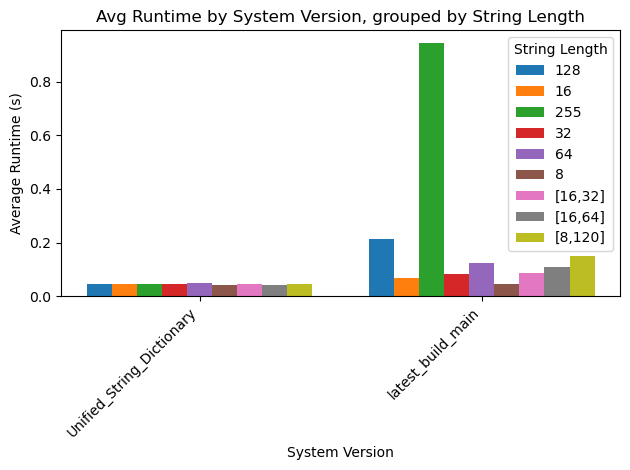

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `df` already exists and has columns:
#   ['system_version', 'string_length', 'avg_runtime', …]

# 1) Pivot so each string_length becomes its own series
pivot = df.pivot_table(
    index='system_version',
    columns='string_length',
    values='avg_runtime'
)

# 2) Plot a grouped bar chart
fig, ax = plt.subplots()
n_versions = len(pivot.index)
n_lengths  = len(pivot.columns)
width      = 0.8 / n_lengths
x_positions = np.arange(n_versions)

for i, length in enumerate(pivot.columns):
    ax.bar(
        x_positions + i * width,
        pivot[length].values,
        width,
        label=str(length)
    )

# 3) Labeling and layout
ax.set_xticks(x_positions + width*(n_lengths-1)/2)
ax.set_xticklabels(pivot.index, rotation=45, ha='right')
ax.set_xlabel('System Version')
ax.set_ylabel('Average Runtime (s)')
ax.set_title('Avg Runtime by System Version, grouped by String Length')
ax.legend(title='String Length')
plt.tight_layout()
plt.show()


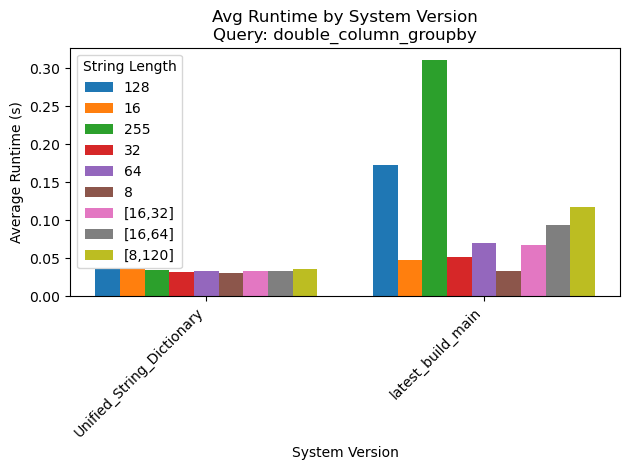

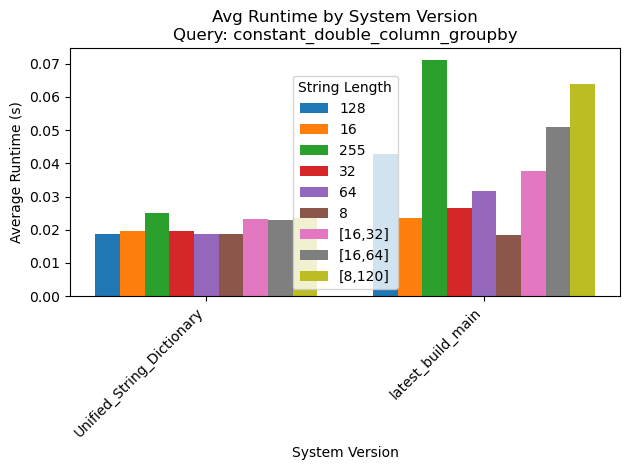

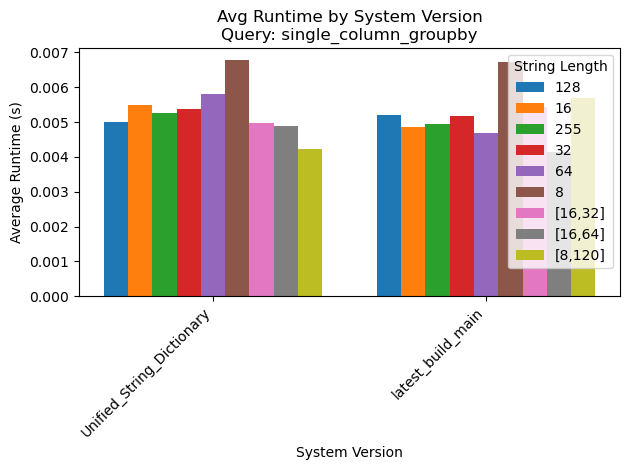

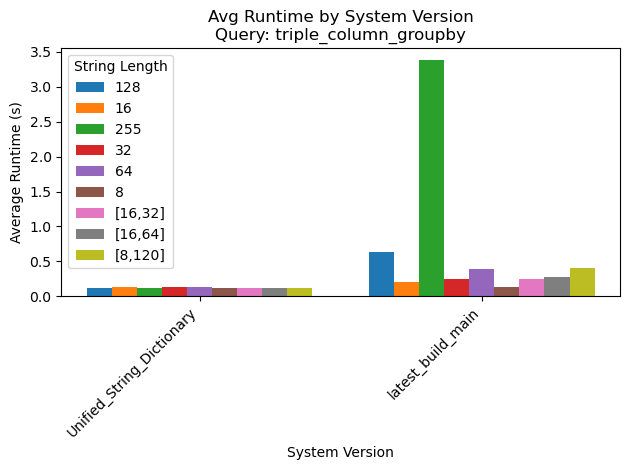

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# assume `df` is your cleaned DataFrame with columns:
# ['query', 'system_version', 'string_length', 'avg_runtime', …]

for query in df['query'].unique():
    # 1) Filter to this query
    sub = df[df['query'] == query]
    
    # 2) Pivot so each string_length is a column
    pivot = sub.pivot_table(
        index='system_version',
        columns='string_length',
        values='avg_runtime'
    )
    
    # 3) Plot
    fig, ax = plt.subplots()
    versions = pivot.index
    lengths  = pivot.columns
    n_v = len(versions)
    n_l = len(lengths)
    width = 0.8 / n_l
    x = np.arange(n_v)
    
    for i, length in enumerate(lengths):
        ax.bar(
            x + i * width,
            pivot[length].values,
            width,
            label=str(length)
        )
    
    # 4) Labels & title
    ax.set_xticks(x + width * (n_l - 1) / 2)
    ax.set_xticklabels(versions, rotation=45, ha='right')
    ax.set_xlabel('System Version')
    ax.set_ylabel('Average Runtime (s)')
    ax.set_title(f'Avg Runtime by System Version\nQuery: {query}')
    ax.legend(title='String Length')
    plt.tight_layout()
    plt.show()


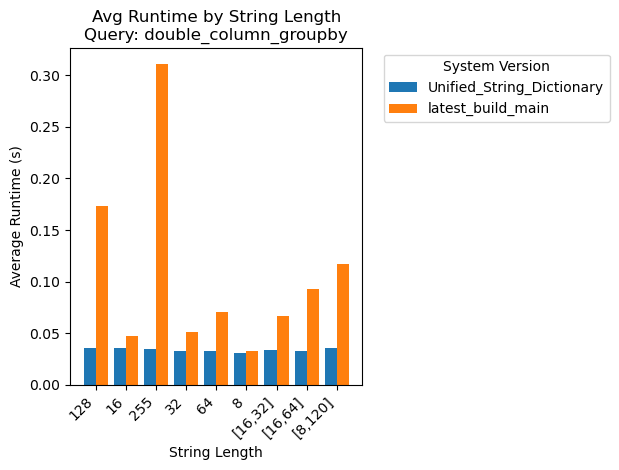

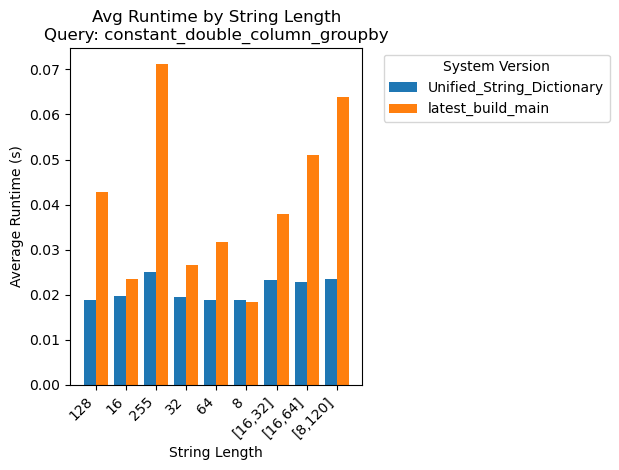

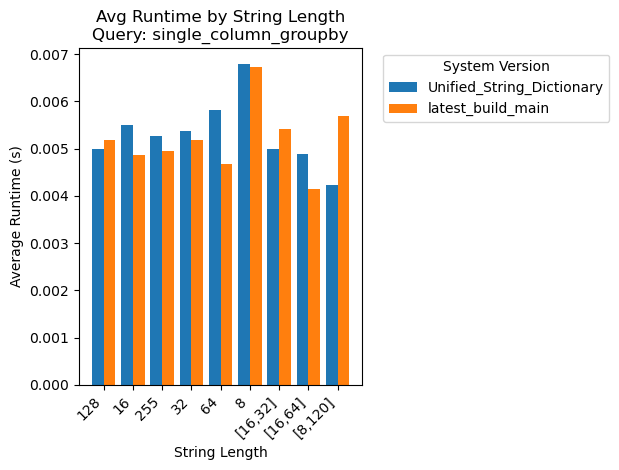

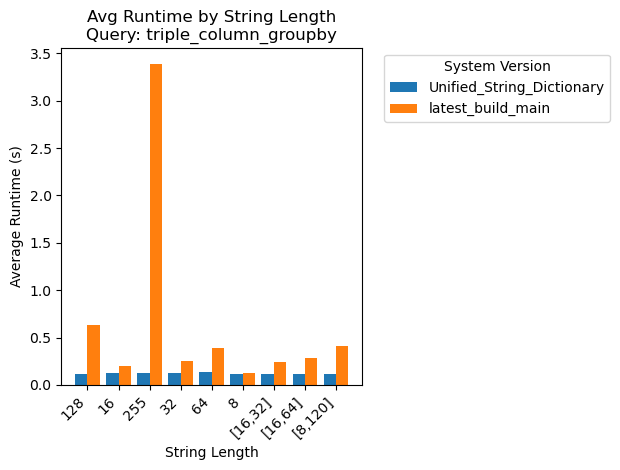

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# assume `df` is your cleaned DataFrame with columns:
# ['query', 'system_version', 'string_length', 'avg_runtime', …]

for query in df['query'].unique():
    sub = df[df['query'] == query]
    
    # Pivot so string_length → rows, system_version → columns
    pivot = sub.pivot_table(
        index='string_length',
        columns='system_version',
        values='avg_runtime'
    )
    
    fig, ax = plt.subplots()
    lengths = pivot.index.astype(str)    # x labels
    versions = pivot.columns             # each bar series
    n_l = len(lengths)
    n_v = len(versions)
    width = 0.8 / n_v
    x = np.arange(n_l)
    
    for i, ver in enumerate(versions):
        ax.bar(
            x + i * width,
            pivot[ver].values,
            width,
            label=str(ver)
        )
    
    ax.set_xticks(x + width * (n_v - 1) / 2)
    ax.set_xticklabels(lengths, rotation=45, ha='right')
    ax.set_xlabel('String Length')
    ax.set_ylabel('Average Runtime (s)')
    ax.set_title(f'Avg Runtime by String Length\nQuery: {query}')
    ax.legend(title='System Version', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


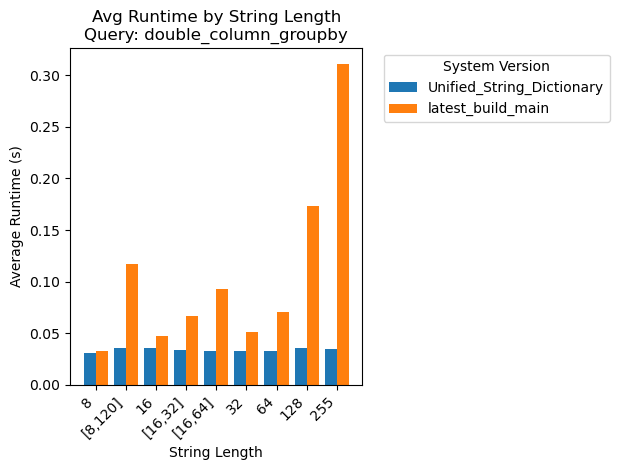

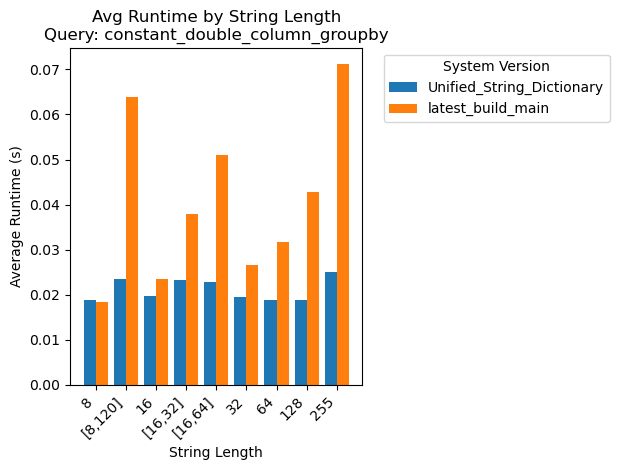

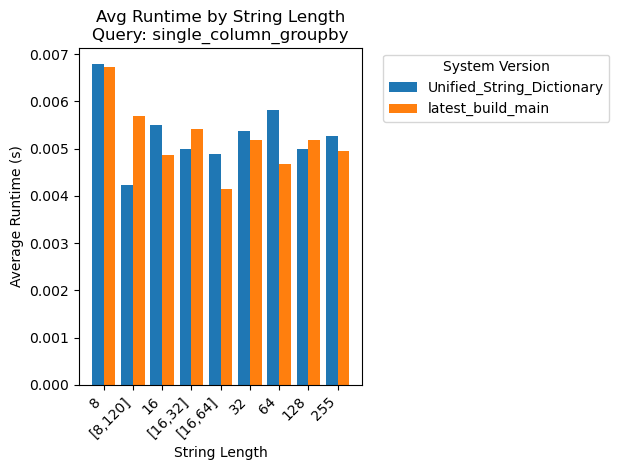

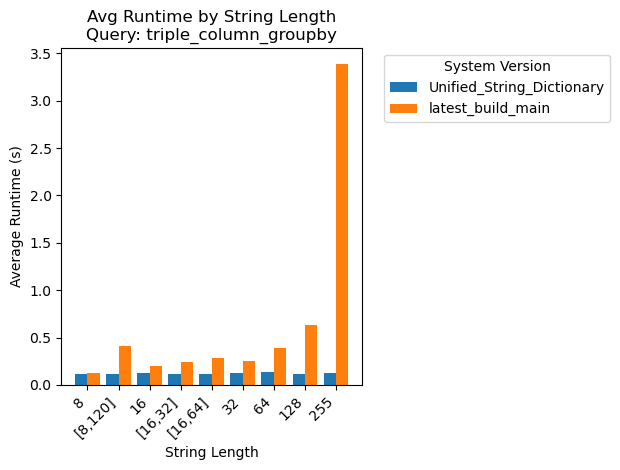

In [12]:
import ast
import numpy as np
import matplotlib.pyplot as plt

# assume `df` is your cleaned DataFrame with columns:
# ['query', 'system_version', 'string_length', 'avg_runtime', …]

def sort_key(s):
    """
    Parse the string_length value (e.g. '8' or '[8,120]') and return
    its lower bound as an integer for sorting.
    """
    try:
        val = ast.literal_eval(s)
        # if it's a list, use the first element; otherwise it's an int
        return val[0] if isinstance(val, (list, tuple)) else int(val)
    except Exception:
        # fallback: convert directly to int
        return int(s)

for query in df['query'].unique():
    sub = df[df['query'] == query]
    
    # Pivot so string_length → rows, system_version → columns
    pivot = sub.pivot_table(
        index='string_length',
        columns='system_version',
        values='avg_runtime'
    )
    
    # Sort the rows by parsed numeric value of string_length
    sorted_lengths = sorted(pivot.index, key=sort_key)
    pivot = pivot.loc[sorted_lengths]
    
    # Plot
    fig, ax = plt.subplots()
    lengths  = pivot.index.astype(str)
    versions = pivot.columns
    n_l = len(lengths)
    n_v = len(versions)
    width = 0.8 / n_v
    x = np.arange(n_l)
    
    for i, ver in enumerate(versions):
        ax.bar(
            x + i * width,
            pivot[ver].values,
            width,
            label=str(ver)
        )
    
    # Labels & title
    ax.set_xticks(x + width * (n_v - 1) / 2)
    ax.set_xticklabels(lengths, rotation=45, ha='right')
    ax.set_xlabel('String Length')
    ax.set_ylabel('Average Runtime (s)')
    ax.set_title(f'Avg Runtime by String Length\nQuery: {query}')
    ax.legend(title='System Version', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


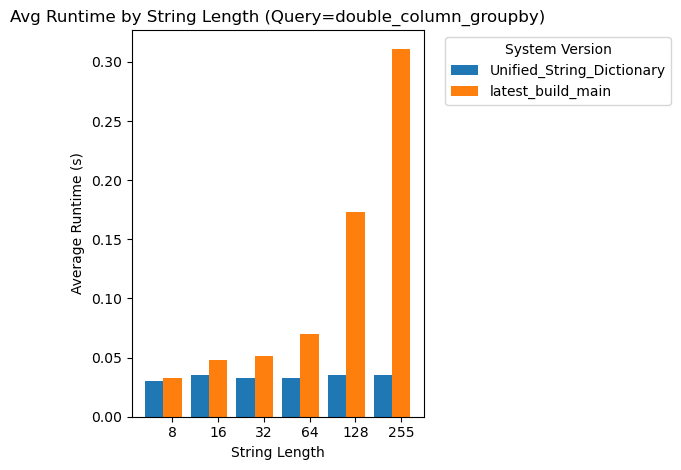

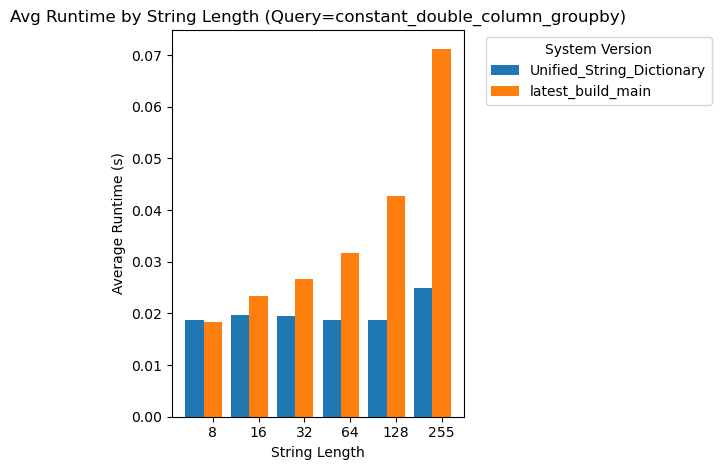

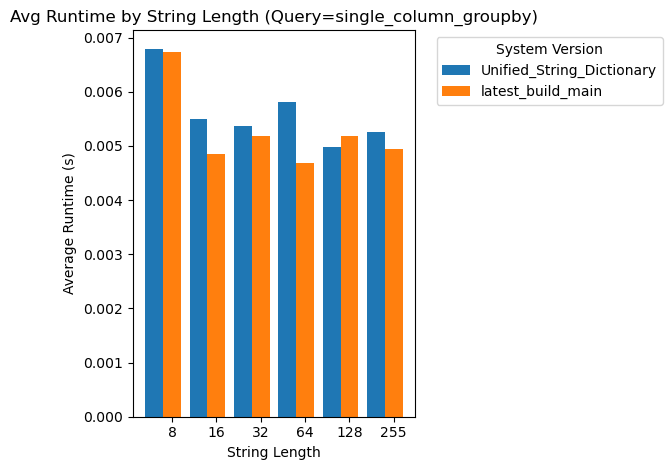

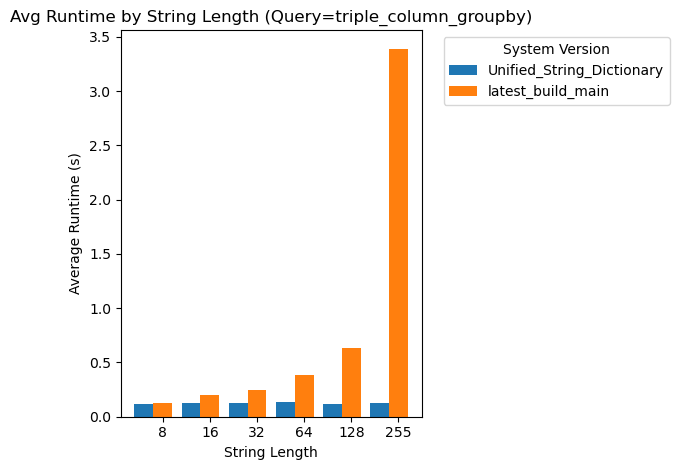

In [18]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your CSV
df = pd.read_csv(
    "/Users/omid/PycharmProjects/benchmarker_omid/_output/"
    "results/USSR_vs_MAIN_n_unique100/2025-07-03-12-44-48/run.csv"
)

# 2. Parse the data_config column into dicts
df["data_config"] = df["data_config"].apply(ast.literal_eval)

# 3. Normalize that into its own DataFrame
config_df = pd.json_normalize(df["data_config"])

# 4. Join back, drop the old column
df = pd.concat([df.drop(columns=["data_config"]), config_df], axis=1)

# 5. Filter out any range‐based string_lengths (i.e. “[x,y]”)
df = df[~df["string_length"].str.match(r"^\[.*\]$")]

# Now df contains only simple lengths like '8', '16', '32', etc.

# --- plotting per‐query, comparing system_version on the same string_length ---

for query in df["query"].unique():
    sub = df[df["query"] == query]
    
    # Pivot so string_length on x, system_version as separate series
    pivot = sub.pivot_table(
        index="string_length",
        columns="system_version",
        values="avg_runtime"
    )
    
    # Sort numeric string_length ascending
    sorted_idx = sorted(pivot.index, key=lambda s: int(ast.literal_eval(s)))
    pivot = pivot.loc[sorted_idx]
    
    # Plot grouped bars
    fig, ax = plt.subplots()
    n_lengths = len(pivot.index)
    n_versions = len(pivot.columns)
    width = 0.8 / n_versions
    x = np.arange(n_lengths)
    
    for i, ver in enumerate(pivot.columns):
        ax.bar(x + i * width,
               pivot[ver].values,
               width,
               label=ver)
    

    center_offset = (n_versions * width) / 2
    ax.set_xticks(x + center_offset)
    ax.set_xticklabels(pivot.index, ha="center")

    ax.set_xlabel("String Length")
    ax.set_ylabel("Average Runtime (s)")
    ax.set_xlabel("String Length")
    ax.set_ylabel("Average Runtime (s)")
    ax.set_title(f"Avg Runtime by String Length (Query={query})")
    ax.legend(title="System Version", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


In [3]:
import os
import uuid
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load & clean as before
df = pd.read_csv(
    "/Users/omid/PycharmProjects/benchmarker_omid/_output/results/USSR_vs_MAIN_n_unique100/2025-07-08-11-14-18/run.csv"
)
df["data_config"] = df["data_config"].apply(ast.literal_eval)
config_df = pd.json_normalize(df["data_config"])
df = pd.concat([df.drop(columns=["data_config"]), config_df], axis=1)
df = df[~df["string_length"].str.match(r"^\[.*\]$")]  # filter out ranges

# 2. Prepare output directory
output_dir = "thesis_plots"
os.makedirs(output_dir, exist_ok=True)

# 3. Loop per query and save
for query in df["query"].unique():
    sub = df[df["query"] == query]
    
    pivot = sub.pivot_table(
        index="string_length",
        columns="system_version",
        values="avg_runtime"
    )
    sorted_idx = sorted(pivot.index, key=lambda s: int(ast.literal_eval(s)))
    pivot = pivot.loc[sorted_idx]
    
    # Plot setup
    fig, ax = plt.subplots()
    n_versions = len(pivot.columns)
    width      = 0.8 / n_versions
    x          = np.arange(len(pivot.index))
    
    for i, ver in enumerate(pivot.columns):
        ax.bar(x + i * width,
               pivot[ver].values,
               width,
               label=ver)
    
    # Center ticks under groups
    center_offset = (n_versions * width) / 2
    ax.set_xticks(x + center_offset)
    ax.set_xticklabels(pivot.index, ha="center")
    
    ax.set_xlabel("String Length")
    ax.set_ylabel("Average Runtime (s)")
    ax.set_title(f"Avg Runtime by String Length (Query={query})")
    ax.legend(title="System Version", loc="upper left")
    plt.tight_layout()
    
    # --- Save to file with description + random ID ---
    random_id = uuid.uuid4().hex[:8]                      # short unique suffix
    safe_query = query.replace(" ", "_")                  # avoid spaces in filename
    fname = f"{safe_query}_{random_id}.png"
    path = os.path.join(output_dir, fname)
    
    fig.savefig(path, dpi=500)
    plt.close(fig)                                        # free memory
    
    print(f"Saved plot for query '{query}' to: {path}")


AttributeError: Can only use .str accessor with string values!

In [4]:
import os
import uuid
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# … load & clean df as before …

output_dir = "thesis_plots"
os.makedirs(output_dir, exist_ok=True)

for query in df["query"].unique():
    sub = df[df["query"] == query]
    pivot = sub.pivot_table(
        index="string_length",
        columns="system_version",
        values="avg_runtime"
    )
    sorted_idx = sorted(pivot.index, key=lambda s: int(ast.literal_eval(s)))
    pivot = pivot.loc[sorted_idx]

    # 1) Create a bigger canvas
    fig, ax = plt.subplots(figsize=(10, 6))  # width, height in inches

    n_versions = len(pivot.columns)
    width      = 0.8 / n_versions
    x          = np.arange(len(pivot.index))

    for i, ver in enumerate(pivot.columns):
        ax.bar(x + i * width, pivot[ver].values, width, label=ver)

    # 2) Center & rotate
    center_offset = (n_versions * width) / 2
    ax.set_xticks(x + center_offset)
    ax.set_xticklabels(pivot.index, ha="center")

    ax.set_xlabel("String Length")
    ax.set_ylabel("Average Runtime (s)")
    ax.set_title(f"Avg Runtime by String Length (Query={query})")

    # 3) Move legend inside or adjust margins so it’s not clipped
    ax.legend(title="System Version", loc="upper left")

    # 4) If you still need more room at the bottom/right:
    plt.subplots_adjust(bottom=0.25, right=0.85)

    # 5) Save with tight bounding box
    random_id = uuid.uuid4().hex[:8]
    safe_query = query.replace(" ", "_")
    fname = f"{safe_query}_{random_id}.png"
    path = os.path.join(output_dir, fname)
    fig.savefig(path, dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.close(fig)

    print(f"Saved plot for '{query}' → {path}")


ValueError: malformed node or string: 16